# Scanning Tunneling Microscopy

**General objective:** 
Explain the basic operational principles of a Scanning Tunneling Microscope and the measurements that can be performed with it. 

1. [Introduction](#1-introduction)
   
2. [Tunneling a Single Particle Through a One-Dimensional Potential Barrier](#2-tunneling-a-single-particle-through-a-one-dimensional-potential-barrier)

    2.1. [Rectangular Potential Barrier](#21-rectangular-potential-barrier)

    2.2. [Non-Rectangular Potential Barrier: Quasiclassical Approximation](#22-non-rectangular-potential-barrier-quasiclassical-approximation)

3. [Tunneling Current Density in Metal-Insulator-Metal Systems](#3-tunneling-current-density-in-metal-insulator-metal-systems)

    3.1. [Low-Voltage Range](#31-low-voltage-range)

    3.2. [Intermediate-Voltage Range](#32-intermediate-voltage-range)

    3.3. [High-Voltage Range](#33-high-voltage-range)

4. [Modeling of the Scanning Process](#4-modeling-of-the-scanning-process)
5. [Conclusion](#5-conclusion)
6. [Bibliography](#Bibliography)


## 1. Introduction

<strong>Scanning Tunneling Microscopy</strong> (STM) is a type of microscope used for imaging surfaces at the atomic level. It operates on the principle of quantum tunneling and was invented by Heinrich Rohrer and Gerd Binnig in 1981, for which they were awarded the Nobel Prize in Physics in 1986 [\[1\]](#bibliography). 

Its widespread applications across physics, chemistry, and materials science have revolutionized our understanding of surface structures, electronic properties, and the intricate world of nanoscale phenomena. As a non-optical technique, STM stands as an indispensable tool for the precise investigation and manipulation of matter, opening new frontiers in the exploration of nanomaterials and nanodevices [\[2\]](#bibliography).

STM operates through three primary modes:

1. **Imaging mode**: this mode encompasses two scanning regimes for achieving atomic resolution of the sample surface morphology:

- *Constant-current* mode (Fig. 1(b)): in this mode, a feedback loop maintains a constant tunneling current between the tip and sample at each lateral position $(x,y)$. Consequently, the tip's $z$-position requires adjustment during scanning.

- *Constant-height* mode (Fig. 1(c)): in this mode, the tunneling current is measured at a fixed vertical position $z$ of the tip.

2. **Spectroscopy mode**: in this mode, the resulting tunelling current $I$ is monitored as a function of changing parameters $z$ or $V$:

- $I(z)$ spectroscopy: involves ramping the distance $z$ at a fixed voltage $V$, useful for characterizing the quality, sharpness, and cleanliness of the STM tip.

- $I(V)$ spectroscopy: measures the tunelling current as a function of voltage $V$, offering crucial insights into the surface electronic structure, including barrier heights, local density of states, and analysis of modes of molecular motion.

3. **Manipulation mode**: This mode allows for the deliberate manipulation of atoms and molecules on the sample surface using the STM tip. By applying voltage pulses or carefully adjusting the tip-sample distance, it becomes possible to pick up, move, and position atoms or molecules with precision. This capability opens avenues for constructing nanostructures, investigating surface reactions, and studying the behavior of individual atoms and molecules in real-time [\[3\]](#bibliography).

<div style="text-align: center;">
    <img src="./figures/scheme_STM_04_04.png" alt="STM_scheme_last.png" width="80%"  />
    <div> Fig.1  Schema of STM (a) and its operating imaging modes: constant-current (b) and constant-height (c) modes. </div>
</div>

####  
The schematic in Figure 1 illustrates the main elements of the STM setup, where piezoelectric elements precisely maneuver a metal tip across the surface of a sample. By maintaining a minimal distance between the tip and the sample (typically, a few angstroms), the tunneling current, resulting from the quantum tunneling of electrons between the tip and the sample, can be measured. The movement of the tip in response to this tunneling current is used to create a topographic image of the sample surface. The typical STM image of the $\text{Bi}_2\text{Se}_3$ surface with a Co adatom deposited on it was used [\[4\]](#bibliography). The red curve represents a surface section of the sample surface in the $xz$ plane, while the black curve depicts the tip's trajectory along this surface in the same plane.

## 2. Tunneling a Single Particle Through a One-Dimensional Potential Barrier

**Objective:** 
Explain the basic elementary theories of one electron tunneling through a one-dimensional potential barrier for understanding the principal of STM. 

In this section we consider briefly elementary theories of one-electron tunneling through a one-dimensional potential barrier to understand the principals of STM. In quantum mechanics, the electron penetration through a potential barrier, $U(z)$ (see Fig. 2(b)), is described by a wave function $\psi(z)$ that can be obtained from the Schrödinger equation,

\begin {equation}
\frac{-\hbar^2}{2m}\frac{d^2\psi(z)}{dz^2} + U(z)\psi(z) = E\psi(z) \tag{1}
\end{equation}

where $\hbar$ is the reduced Planck’s constant, $m$ is the mass of the electron, $E$ is its energy and $z$ its position.


### 2.1. Rectangular Potential Barrier

Firstly, we consider a simple rectangular barrier that electrons pass through from the sample to the tip region.

<div style="text-align: center;">

<img src="./figures/Fig_2a_01_03.png" alt="Consept ot Tunneling" width="40%"  />
<div> Fig.2  Schema of a particle tunneling through a rectangular potential barrier.</div>

</div>

In the case of a rectangular potential barrier $U(z)$ the solution to the wave equation (1) for each region , sample (s), barrier (b) and tip (t) are written as:


1. sample: $z >=0$ and $U(z)= 0:$  
$$\psi_s(z) = e^{ikz} + Ae^{-ikz} \text{- incoming wave + reflected wave}\tag{2.1}$$

2. barrier: $0 < z < d $ and $U(z) = U:$ 
$$\psi_b(z) = Be^{-\varkappa z} + Ce^{\varkappa z} \text{- decaying wave function in barrier}\tag{2.2}$$

3. tip: $z < d$ and $U(z) = 0:$
$$\psi_t(z) = De^{ikz} \text{- transmitted wave} \tag{2.3}$$

where $ k = \frac{\sqrt{2mE_0}}{\hbar} $ and $\varkappa = \frac{\sqrt{2m(U - E_0)}}{\hbar}.$

In each region, expressions involve two waves propagating along the $z$-axis, among other factors. In the sample region, we assume that electron goes to the barrier with the unit amplitude (the first term), where the second term represents the reflected wave and the coefficient A is associated with the electron's reflectance from the barrier. In the tip region, we assume only the presence of the transmitted wave, represented by the coefficient D.

The coefficients $A, B, C$ and $D$ result from the wave function continuity condition at two interface:
$$\psi_s(0) = \psi_b(0)\tag{3} $$
$$\psi_b(d) = \psi_t(d) \tag{4}$$
$$ \frac{d\psi_s(0)}{dz} = \frac{d\psi_b(0)}{dz} \tag{5}$$
$$\frac{d\psi_b(d)}{dz} = \frac{d\psi_t(d)}{dz}\tag{6}

Equations (2)-(6) can be written in the following matrix form:
\begin{align}
    \begin{pmatrix}
        1 & -1 & -1 & 0 \\
        -ik & \varkappa & -\varkappa & 0 \\
        0 & e^{-\varkappa d} & e^{\varkappa d} & -e^{ikd} \\
        0 & -\varkappa e^{-\varkappa d} & \varkappa e^{\varkappa d} & -ike^{ikd} \\
    \end{pmatrix}
    \begin{pmatrix}
        A \\
        B \\
        C \\
        D \\
    \end{pmatrix}
    &=
    \begin{pmatrix}
        -1 \\
        -ik \\
        0 \\
        0 \\
    \end{pmatrix}
    \tag{7}
\end{align}

Form Eq.(7) we can find analytical expressions for these coefficients:

$$ A = \frac{(k^2 + \kappa^2) \sinh(\kappa d)}{2 \cdot 1j \cdot k \cdot \kappa \cosh(\kappa d)+(k^2-\kappa^2) \sinh(\kappa d)} \tag {8}$$
$$ B = \frac {k(k + 1j \cdot kappa) \exp(kappa \cdot d)}{2 \cdot 1j \cdot k \cdot \kappa \cosh(\kappa d)+(k^2-\kappa^2) \sinh(\kappa d)} \tag{9}$$
$$ C = \frac {-k(k - 1j \cdot kappa) \exp(-kappa \cdot d)}{2 \cdot 1j \cdot k \cdot \kappa \cosh(\kappa d)+(k^2-\kappa^2) \sinh(\kappa d)} \tag{10}$$
$$ D = \frac{2 \cdot 1j \cdot kappa \cdot k \exp(-1j \cdot k * d)}{2 \cdot 1j \cdot k \cdot \kappa \cosh(\kappa d)+(k^2-\kappa^2) \sinh(\kappa d)} \tag {11} $$

In addition we can solve Eq.(7) numerically using the NumPy library as demomstrated in this notebook.

Below we calculate these coefficients and plot real part of the wave function for the rectangular barrier.

In [88]:
"""
    import library

    determining the constant and physical variables:
        m - mass of electron [kg];
        U - potential energy [J];
        E0 - particle energy [J];
        k - wave vector [1/m];
        kappa - decaying coefficient [1/m];
        d - potential barrier width [m];

        ! in this notebook we use SI (the International System of units)) if there are no clarifications: 1 eV = 1.6e-19 J


"""

import numpy as np
import matplotlib.pyplot as plt

#Constants
e = 1.6e-19
m = 9.11e-31            #Electron mass in kg
hbar = 1.054e-34        #redused Planck constant in 6.5821e-16 eV*s or 1.054e-34 J*s
h = 2*np.pi*1.054e-34   #Planck constant J*s

# Data input
U = 1*e         
E0 = 0.5*U

phi = 4.5*e     # Work function in J
V = 0.3         # Applied voltage in V

k = (np.sqrt(2 * m * E0)/hbar)
kappa = (np.sqrt(2 * m * (U - E0))/hbar)
d = 10e-10

print(f"k = {k*1e-9:.4} 1/nm")
print(f"kappa = {kappa*1e-9:.4} 1/nm")

k = 3.622 1/nm
kappa = 3.622 1/nm


In [67]:
"""
    analytical solutions for A, B, C, D eq(7) obtained in "Mathematica" eq.(8)-(11)
"""

F = 2*1j*k*kappa*np.cosh(kappa*d)+(k**2-kappa**2)*np.sinh(kappa*d)

A = (k**2 + kappa**2)*np.sinh(kappa*d)/F
B = (k*(k+1j*kappa)*np.exp(kappa*d))/F
C = (-k*(k-1j*kappa)*np.exp(-kappa*d))/F
D = (2*1j*kappa*k*np.exp(-1j * k * d))/F

print(f"A={A}")
print(f"B={B}, C={C}")
print(f"D={D}")
print(f"R + T = {np.abs(A)**2 + np.abs(D)**2}")

A=-0.998572840423425j
B=(0.9992864202117127-0.9992864202117127j), C=(0.000713579788287729+0.000713579788287729j)
D=(-0.047355275664056305+0.024693323702473548j)
R + T = 1.0000000000000009


In [68]:
"""
    numerical solutions for A, B, C, D eq(7) obtained using NumPy
"""

M = np.array([[1,-1,-1,0], 
              [-1j*k, kappa, -kappa, 0], 
              [0, np.exp(-kappa*d), np.exp(kappa*d), -np.exp(1j*k*d)], 
              [0, -kappa*np.exp(-kappa*d), kappa*np.exp(kappa*d), -1j*k*np.exp(1j*k*d)]])

N = np.array([-1, -1j*k, 0, 0])

x = np.linalg.solve(M,N)

print(f"A= {x[0]}")
print(f"B={x[1]}, C= {x[2]}")
print(f"D={x[3]}")

print (f'inverse matrix = {np.linalg.inv(M)}' )
print (f'coeficient obtained by using inverse matrix  = {np.linalg.inv(M)@N}' )

print(f"R + T = {np.abs(x[0])**2 + np.abs(x[3])**2}")

A= (-0-0.9985728404234242j)
B=(0.999286420211712-0.9992864202117122j), C= (0.0007135797882877286+0.0007135797882877285j)
D=(-0.04735527566405629+0.024693323702473534j)
inverse matrix = [[ 5.00000000e-01+4.99286420e-01j  1.37838705e-10+1.38035704e-10j
   2.67033817e-02+3.80319383e-15j -1.41181947e-24+7.37204019e-12j]
 [-4.99643210e-01+4.99643210e-01j  1.37937205e-10+1.37937205e-10j
   1.33516908e-02+1.33516908e-02j -3.68602009e-12+3.68602009e-12j]
 [-3.56789894e-04-3.56789894e-04j -9.84994886e-14+9.84994886e-14j
   1.33516908e-02-1.33516908e-02j  3.68602009e-12+3.68602009e-12j]
 [ 2.36776378e-02-1.23466619e-02j -3.40856033e-12-6.53671883e-12j
   6.74196989e-01+2.11530966e-01j -1.86042920e-10-5.86634138e-11j]]
coeficient obtained by using inverse matrix  = [-1.66533454e-16-9.98572840e-01j  9.99286420e-01-9.99286420e-01j
  7.13579788e-04+7.13579788e-04j -4.73552757e-02+2.46933237e-02j]
R + T = 0.9999999999999993


In [69]:
"""
    otherwise, to finde solutions for A, B, C, D eq(7), we need to multiply the inverse matrix M^(-1) by the matrix N using NumPy
"""

print (f"inverse matrix = {np.linalg.inv(M)}")
print(f"coefficient obtained by using inverse matrix = {np.linalg.inv(M)@N}")

inverse matrix = [[ 5.00000000e-01+4.99286420e-01j  1.37838705e-10+1.38035704e-10j
   2.67033817e-02+3.80319383e-15j -1.41181947e-24+7.37204019e-12j]
 [-4.99643210e-01+4.99643210e-01j  1.37937205e-10+1.37937205e-10j
   1.33516908e-02+1.33516908e-02j -3.68602009e-12+3.68602009e-12j]
 [-3.56789894e-04-3.56789894e-04j -9.84994886e-14+9.84994886e-14j
   1.33516908e-02-1.33516908e-02j  3.68602009e-12+3.68602009e-12j]
 [ 2.36776378e-02-1.23466619e-02j -3.40856033e-12-6.53671883e-12j
   6.74196989e-01+2.11530966e-01j -1.86042920e-10-5.86634138e-11j]]
coefficient obtained by using inverse matrix = [-1.66533454e-16-9.98572840e-01j  9.99286420e-01-9.99286420e-01j
  7.13579788e-04+7.13579788e-04j -4.73552757e-02+2.46933237e-02j]


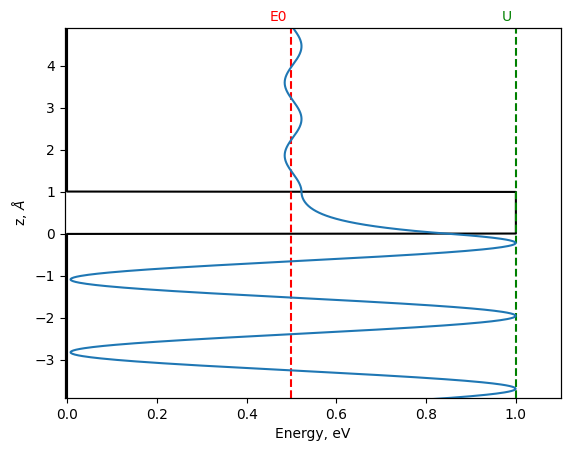

In [70]:
# Define the conditions for energy dependency
def barrier_energy(z, d):
    out = np.zeros_like(z)
    cond = z <= 0
    out[cond] = 0
    cond = np.logical_and(z > 0,  z < d)
    out[cond] = U/e
    cond = z >= d
    out[cond] = 0
    return out
    
# Define the conditions for wave function dependency
def wave_function(z, d, x):
    out = np.zeros_like(z, dtype=np.complex64)
    cond = z <= 0
    out[cond] = np.exp(1j*k*z[cond]) + x[0]*np.exp(-1j*k*z[cond])
    cond = np.logical_and(z > 0,  z < d)
    out[cond] = x[1]*np.exp(-kappa*z[cond]) + x[2]*np.exp(kappa*z[cond])
    cond = z >= d
    out[cond] = x[3]*np.exp(1j*k*z[cond])
    return out


# Define the range of z values
z_min = -4*d
z_max = (4 + 1)*d

z = np.linspace(z_min, z_max, 1000)  # Adjust the range as needed

# Calculate the energy values for each z
barrier_energy_values = barrier_energy(z, d)
wf_energy_values = wave_function(z, d, x)


# Plot the energy and wave function dependencies
fig, ax1 = plt.subplots()

ax1.set_ylabel('z, $\AA$')
ax1.set_xlabel('Energy, eV')
ax1.plot(barrier_energy_values, z*1e9, 'black')

ax1.tick_params(axis='y')
ax1.axvline(x=E0/e, color='red', linestyle='--')
ax1.axvline(x=U/e, color='green', linestyle='--')
# Add labels near the vertical dashed lines
ax1.text(E0/e-0.01, z_max*1e9, 'E0', color='red', verticalalignment='bottom', horizontalalignment='right')
ax1.text(U/e-0.01,  z_max*1e9, 'U', color='green', verticalalignment='bottom', horizontalalignment='right')

ax2 = ax1.twiny()  
color = 'tab:blue'
ax2.plot(np.real(wf_energy_values),  z*1e9, color=color)

ax2.set_ylim([-3.9, 4.9])
ax2.set_xlim([-1.45, 1.7])
ax1.set_xlim([-0.005, 1.1])

ax2.set_xticks([])

plt.show()

While the incident wave amplitude is assumed to be 1 (Eq.(2)m if $z >=0$), the barrier transmission coefficient is the transmitted electrons probability flux density $|\psi(z)|^2$ in the tip region and can be written in the form using Eq.(11):

$$T = |\psi_{t}(z)|^2 = DD^* = \left(ch^2(\varkappa d)+\frac{1}{4} \left(\frac{\varkappa}{k} - \frac{k}{\varkappa}\right)^2 sh^2 (\varkappa d)\right)^{-1}\tag{12}$$

For low particle energy ($E_0 << U$)  and wide rectangular barrier ($\varkappa d >> 1$), the probability of transmission simplifies to:
$$T(E) = T_0 \exp{\left(-\frac{2d}{\hbar}\sqrt{2m(U - E_0)}\right)} \tag{13}$$
where $T_0 = 4\left[1 + \frac{1}{4} \left(\frac{\varkappa}{k} - \frac{k}{\varkappa}\right)^2\right]^{-1}$.

    **!?** How does the wave function and transmission change when the parameters of the barrier are modified?

### 2.2. Non-Rectangular Potential Barrier: Quasiclassical Approximation

To obtain the transmittance of non-rectangular barriers (when the barrier height is slowly changed relatively to the de Broglie wavelenght: $d << \lambda $) we can use **the quasiclassical approximation** or **WKB approximation** [\[5\]](#Bibliography).

Finally, the barrier transparency in the quasiclassical approximation takes the form

$$ T(E) \approx \exp\left\{ -\frac{2}{\hbar}\int\limits_{z_1 = 0}^{z_2 = d} \sqrt{2m(U(z) - E)dz} \right\}\tag{14} $$

where $E = m{v}^2/2$.

One can see, that in case of the square barrier there isn't qualitative difference between calculation of transmission coefficient using quantum mechanics  (eq.(13)) or WKB approximation (eq.(14)).



## 3. Tunneling Current Density in Metal-Insulator-Metal Systems

**Objective:** Examining the correlation between the tunneling current magnitude in MIM systems with arbitrary-shaped potential barriers and the applied voltage

<div style="text-align: center;">
<img src="./figures/Fig_2b_07_03.png" alt="Consept ot Tunneling" width="40%"  />

Fig.2 Model of an MIM system with an arbitrary shape of potential barrier, where $V$ represents the applied bias, $e$ is the elementary charge, $\delta_z$ is vertical distance, $E_{F}$ is the Fermi level, $N_1$ and $N_2$ - the number of electrons tunneling through the barrier in two directions, $\Phi_{t}$, $\Phi_{s}$ are work functions of materials of the materials of the tip and sample, respectively..
</div>

In this section we consider a metal-insulator-metal (MIM) system. Under thermodynamic equilibrium, the Fermi levels in the metals coincide. This equilibrium state implies a balance in electron distribution between the two electrodes. Applying the bias voltage between the electrodes (or the bias energy $eV$) leads to the initiation of a **tunnel current**, namely, the flow of electron across the insulating barrier. 

The tunneling current density $J$ depends on the energy density of states $n(p_z)$ and probability $T(E_z)$ of the electron transmission through the barrier of height $U(z)$. To obtain the current density we need to know the number of particles passing through the barrier: $N = N_1 - N_2$, where $N_1$ and $N_2$ represent the number of electrons passing in each direction:

$$ N_1 = \int\limits_0^{E_\infty}{T(E_z)n(p_z)dE_z} \tag{15}$$

where
 $$ n(p_z) = \frac{1}{4\pi^3\hbar^3}\int\limits_{-\infty}^{\infty}\int\limits_{-\infty}^{\infty}{f_1(E)(1 - f_2(E + eV))dp_xdp_y} \tag{16}$$
and $f_1(E)$, $f_2(E + eV)$ - the Fermi-Dirac functions for the first (sample) and the second (tip) electrodes, respectively.

After integration expression (16) in polar coordinates (where $p_r^2=p_x^2+p_y^2$ and $E = E_z + E_r$) and substituting it into (15) we can obtain the number of electrons $N_1$ tunneling through the barrier from elecrtode 1(sample) into electrode 2 (tip)  [\[6\]](#bibliography):
$$N_1 = \frac{m}{2\pi^2\hbar^3}\int\limits_0^\infty {T(E_z)dE_z}\int\limits_0^\infty{f_1(E_z + E_r)(1 -f_2(E_z + E_r + eV))dE_r} \tag{17}$$

By analogy, the number of electrons $N_2$ tunneling through the barrier from elecrtode 2(tip) into electrode 1 (sample) [\[6\]](#bibliography):
$$N_2 = \frac{m}{2\pi^2\hbar^3}\int\limits_0^\infty {T(E_z)dE_z}\int\limits_0^\infty{f_2(E_z + E_r + eV)(1 -f_1(E_z + E_r))dE_r}\tag{18}$$

Let's introduce
$$\xi_1(E_z) = \frac{me}{2\pi^2\hbar^3}\int\limits_0^\infty{f_1(E)(1 - f_2(E + eV))dE_r}$$

$$\xi_2(E_z) = \frac{me}{2\pi^2\hbar^3}\int\limits_0^\infty{f_2(E + eV)(1 - f_1(E))dE_r}$$

$$\xi(E_z,eV)=\xi_1-\xi_2 = \frac{me}{2\pi^2\hbar^3}\int\limits_0^\infty{\left[f_1(E) - f_2(E + eV)\right]dE_r}

Then the tunneling current density in an MIM system for a potential barrier with an arbitrary shape takes the form

$$ J = \int\limits_0^{E_\infty}{T(E_z)\xi(E_z,eV)dE_z} \tag{19}

According Fig.2 $U(z)$ can be written in form $U(z) = \mu + \varphi(z)$. Then, integrating (14) by using expression $\int_{z_1}^{z_2}{\sqrt{f(z)dz} = \beta\sqrt{\bar f \delta_z}}$ form [\[6\]](#bibliography) we get

$$T(E_z) \propto \exp{\left\{-A \delta_z \sqrt{\mu + \bar \phi(z) - E_z}\right\}} \tag{20}$$

where $\bar \phi$ - is the average barrier height relative to the Fermi level of the negative electrode. In the case of vacuum, it is determined by the work functions of the two electrodes. $\mu$ is chemical potential (see [\[6\]](#bibliography)) which in a metal at the temperatures close to absolute zero coincides with the Fermi level. The factor $A$ is definded in Eq.(23). 

At  $T = 0 K$ 

$$\xi(E_z) = \frac{me}{2\pi^2\hbar^3}\begin{cases}
                                        eV, & E_z \in \left[0; \mu - eV \right];\\
                                        \mu - E_z, & E_z \in \left[\mu - eV; \mu \right];\\
                                        0, & E_z > \mu
                                    \end {cases} \tag{21} $$



By introducing equations (16) and (17) into eq.(15) and integrating the resulting expression, we obtain the aproximate dependence of the **tunelling current density on the applied voltage** in the MIM system for arbitrary barrier shapes (for more details, refer to [\[6\]](#bibliography),[\[7\]](#bibliography))

$$ \boxed {J = \frac{J_0}{\delta_z^2}\left\{\bar \phi \exp\left[{-A\delta_z\sqrt{\bar \phi}}\right] - (\bar \phi + eV) \exp\left[-A\delta_z\sqrt{\bar \phi + eV}\right] \right\}}\tag{22}$$

where   
        $$ J_0 = \frac{e}{4\pi^2\beta^2\hbar},$$
        $$ A = 2\beta\sqrt{\frac{2m}{\hbar^2}}\tag{23},$$ 
        $\beta$ - the correction factor that depends on the bais, for more details refer to[\[7\]](#bibliography).  
        $\bar \phi$ - average barrier height,  
        $\delta_z$ - barrier width,  
        $V$ - voltage between electrodes.

**Equation (22) can be applied to any shape of potential barrier satisfying WKB conditions and providing the mean barrier height is known and can be interpreted as a current density $J_0\bar \phi \exp({-A\delta_z\sqrt{\bar \phi}})$ flowing from electrode 1 to electrode 2 and $ J_0(\bar \phi + eV) \exp(-A\delta_z\sqrt{\bar \phi + eV})$ flowing from electrode 2 to electrode 1 (see, Fig.2).**

A = 2.5613184100792345e+19, J0 = 38452062103353.99, S=1.5707963267948966e-18


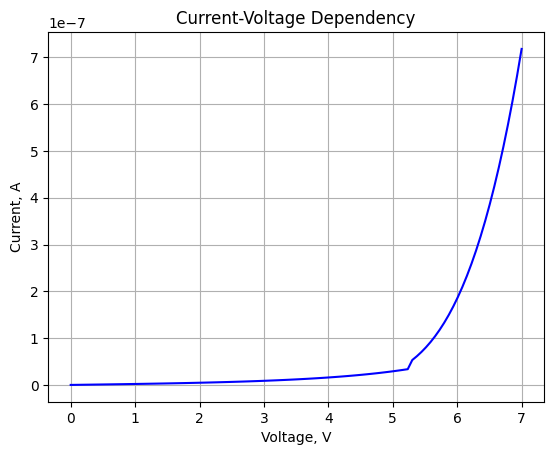

In [74]:
"""  
    Plot the current-voltage dependence for carbon-insulator-platinum barrier structure 
    with width of barrier d = 5e-10 m and contact area S.

    According to [6] and [7]: d, phi and beta depend on the applied voltage.

    Use the basic formula (22) 
"""
# Data input
phi_s = 4.7*e # Work function eV sample (carbon)
phi_t = 5.3*e  # Work function eV tip (platinum)
S = 2 * np.pi * (5e-10)**2

V0 = np.linspace(0, 7, 100)
ds = np.zeros_like(V0)
phi = np.zeros_like(V0)
beta = np.zeros_like(V0)

# Low-Voltage Range : phi >> eV
cond1 = V0 < 0.5
ds[cond1] = d 
phi[cond1] = (phi_s + phi_t) / 2
beta[cond1]= 1

# Intermediate-Voltage Range : eV < phi
cond2 = V0 <= phi_t / e
ds[cond2] = d 
phi[cond2] = (phi_s + (phi_t - e*V0[cond2])) / 2
beta[cond2] = 1

# High-Voltage Range: eV > phi_t
cond3 = V0 > phi_t / e
ds[cond3] = d * phi_s / (e*V0[cond3]) / (1 + (phi_s - phi_t)/(e*V0[cond3])) 
phi[cond3] = phi_s / 2
beta[cond3] = 23/24



A = (2 * beta * np.sqrt(2 * m)) / hbar #eq.19
J0 = e / (4 * hbar * (beta * np.pi)**2)

print(f"A = {A[0]}, J0 = {J0[0]}, S={S}")


J = (J0 / ds**2) * (phi * np.exp(-A * ds * np.sqrt(phi))
                  -(phi + e*V0) * np.exp(-A * ds * np.sqrt(phi + e*V0)))


plt.plot(V0, J * S, color='blue')

plt.xlabel('Voltage, V')
plt.ylabel('Current, A')
plt.title('Current-Voltage Dependency')

# Show the plot
plt.grid(True)
plt.show()

Next step: obtain analitical expressions $I(V)$ for differenr intervals of applied voltage (Fig.3): 
$V \sim 0$; $eV < \Phi_t$; $eV > \Phi_t$.

<div style="text-align: center;">

<img src="./figures/Fig_3_20_03.png" alt="Potential barrier in MIM system in case different values of V " width="80%"  />

Fig.3  Potential Barrier Diagram of MIM System for various applied voltages ($V$): (a) $V \sim 0$; (b) $eV < \Phi_t$ and (c) $eV > \Phi_t.$
</div>

### 3.1. Low-Voltage Range

At low voltages $\bar \phi >> eV$ expression (22) can be simplified 

$$ J_L = \frac{J_0}{\delta_z^2} eV\left[A \delta_z \sqrt{\bar \phi}/2 - 1 \right] \exp \left[ -A\delta_z \sqrt{\bar \phi}\right] \tag{24}$$

Since $A \delta_z \sqrt{\bar \phi}/2 >> 1$ eq.(20) reduces to

$$ \boxed {J_L = \frac{J_{0L}}{\delta_z} \sqrt{\bar \phi}V \exp \left[ -A\delta_z\sqrt{\bar \phi}\right] \tag{25} }$$

where $$ J_{0L} = \frac{e^2\sqrt{2m}}{4\pi^2\hbar^2\beta} \tag{26} $$

The energy diagram for this case is shown on Fig.3(a), how we can see $\delta_z = d$ and $\bar \phi = (\Phi_s + \Phi_t) / 2$. The coefficient $\beta$ was defined in [\[7\]](#bibliography), where it was observed that, since $eV \simeq 0$, $\beta$ takes the value unity. $A$ is defined in eq.(23).

Thus, in this case Eq.(25) expresses $J$ as a linear function of $V$ (see section 1 on the Fig.4.).

### 3.2. Intermediate-Voltage Range

If $eV < \Phi_t$ we can see from Fig.3(b) that $\delta_z = d$ and $\bar \phi = (\Phi_s + \Phi_t - eV)/2$. In [\[7\]](#Bibliography) it is shown, that for this case the tunneling current-voltage relation is given by

$$ \boxed {J_I = \frac{J_{0I}}{\delta_z^2} \left\{\left(\phi_s - \frac{eV}{2}\right) \exp{\left(-A d \sqrt{\phi_s -  \frac{eV}{2}}\right)} -
              \left(\phi_s + \frac{eV}{2}\right) \exp{\left(-A d \sqrt{\phi_s + \frac{eV}{2}}\right)} \right\}}, \tag{27}$$

where
$$ J_{0I} = \frac{e}{4\pi^2\beta^2 \hbar},$$


$ \beta = 1 - (eV)^2/96 (\phi_s - eV/2)^2 $ 

The value of $A$ is defined above in eq.(19). Using eq.(23) the current-voltage characteristic was plotted in Fig.4 (in red). 

### 3.3. High-Voltage Range

Figure 3(c) illustrates the energy diagram for the case, when $eV > \Phi_t$. From this figure let's define 

$ \delta_z = d  \Phi_s(\Phi_s + \Phi_t + eV)$  and

$\bar \phi = \Phi_s/2$.

Substituting this values in eq.(18), we obtain expression for the tunelling current density in high voltage range case:

$$ \boxed {J_H = \frac{J_{0H}}{\Phi_s} \left\{ \exp{\left[ -A_H\Phi_s^{3/2}\right]} - \left( 1 + \frac{2eV}{\Phi_s}\right) \exp{\left[ -A_H\Phi_s^{3/2} \sqrt{1 + \frac{2eV}{\Phi_s}} \right]} \right\}}, \tag{28}  $$

where $ F = V/d $ defines the electric field strength in the insulator, the coefficient $J_H$  and $A_H$ are described by the following expressions:

$$ J_{0H} = \frac{e^3F^2}{8\pi^2\hbar\beta^2}$$

$$ A_H = 2  \frac{\beta \sqrt(m)}{eF\hbar}$$

In this case, it is necessary to determine a value of the correction factor $\beta$, as described in [\[7\]](#Bibliography) 
$$\beta = 1 - \left[ \frac{eV/d^2}{\delta_z}\right]\int\limits_0^{\delta_z = d\Phi_s/eV} (\delta_z/2 - x)^2dx/(\Phi_s/2)^2 = 1 - 1/24 = 23/24 $$



Using equations (25)-(28) plot current-voltage characteristic (Fig.4) for case of carbone electrode 1(sample) with $\Phi = 4,7 eV$ and platinum electrode 2 (tip) with $\Phi = 5,3 eV$ at $d = 5 \AA$ and contact area $ S = 10^{-17} m^2 $. 

! To find the tunnel current in [$A$] you need the tunnel current density [$A/m^2$] to multiply by the contact area [$m^2$].

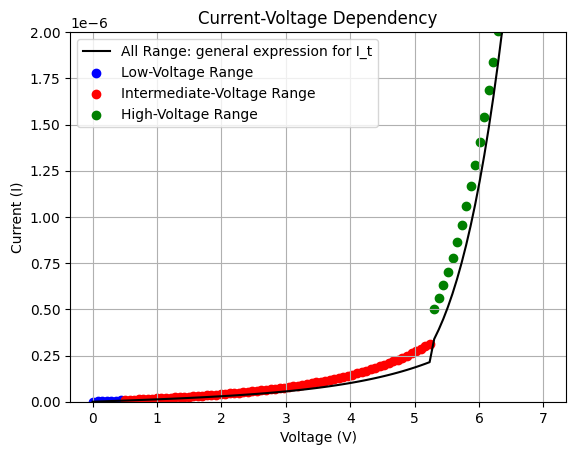

In [75]:
"""
    Using equations (21)-(24) plot current-voltage characteristic for case of 
        phi_s = 4,7 * 1.6e-19 J - work function of carbone - electrode 1(sample);
        phi_t = 5,3 1.6e-19 J - work function of platinum electrode 2 (tip) with ;
        d = 5 e-10 m - distance between electrodes 
        S = 10-17 m^2 - contact area S = 10-17 m^2. 
        V -  applied voltage in V
"""

d = 5e-10

V = np.linspace(0.01, 7, 100)
delta = np.zeros_like(V)
phi = np.zeros_like(V)
beta = np.zeros_like(V)

# Low-Voltage Range : phi >> eV
cond1 = V < 0.5
delta[cond1] = d 
phi[cond1] = (phi_s + phi_t) / 2
beta[cond1]= 1

# Intermediate-Voltage Range : eV < phi
cond2 = V <= phi_t / e
delta[cond2] = d 
phi[cond2] = (phi_s + phi_t - e*V[cond2]) / 2
beta[cond2] =  1 - (e*V[cond2])**2/96 * (phi_s - e*V[cond2] / 2)

# High-Voltage Range: eV > phi_t
cond3 = V > phi_t / e
delta[cond3] = d * phi_s / (e*V[cond3]) / (1 + (phi_s - phi_t)/(e*V[cond3])) 
phi[cond3] = phi_s / 2
beta[cond3] = 23/24



# Low-Voltage Range : phi >> eV

A1 = (2 * beta * np.sqrt(2*m)) / hbar #eq.19

J_L1 = ((e**2) * np.sqrt(2*m)) / (beta * (2*np.pi*hbar)**2) #eq.22
J_1 = J_L1  * (V * np.sqrt(phi) / d) * np.exp(-A1 * d *np.sqrt(phi))  #eq.21
J_1[~cond1] = np.nan

# print(f"J_L = {J_L1 *np.sqrt(phi) * V}")


# Intermediate-Voltage Range : eV < phi
A2 = (2 * beta * np.sqrt(2*m)) / hbar #eq.19

J_L2 = e / (2*np.pi*h) #eq.

J_2 = (J_L2/d**2) * ((phi_s - e*V/2) * np.exp(-A2 * d * np.sqrt(phi_s - e*V/2)) -
              (phi_s + e*V/2) * np.exp(-A2 * d * np.sqrt(phi_s + e*V/2))) #eq.23
J_2[V < 0.5] = np.nan
J_2[cond3] = np.nan


# High-Voltage Range: eV > phi_t

F = V/d
A3 = 2 * beta * phi_s**(3/2) * np.sqrt(m)/(e*F*hbar)
J_L3 = e**3 * (F/beta)**2 / (8*np.pi*h*phi_s)

J_3 = J_L3 * (np.exp(-A3)
    - (1 + (2*e*V)/phi_s)*np.exp(-A3 * np.sqrt(1 + (2 * e * V) / phi_s))) #eq.24

J_3[cond1] = np.nan
J_3[cond2] = np.nan


S = 1e-17


# Plot each interval's I(V) dependency
plt.plot(V0, J * S, label="All Range: general expression for I_t", color='black')

plt.scatter(V, J_1 * S, label="Low-Voltage Range", color='blue')
plt.scatter(V, J_2 * S, label="Intermediate-Voltage Range", color='red')
plt.scatter(V, J_3 * S, label="High-Voltage Range", color='green')
# plt.plot(V4, J_4, label="High-Voltage Range (if eV > phi + mu)", color='orange')

# Add labels and legend
plt.xlabel('Voltage (V)')
plt.ylabel('Current (I)')
plt.title('Current-Voltage Dependency')
plt.legend()
plt.ylim([0,2e-6])

# Show the plot
plt.grid(True)
plt.show()

# print (-A1 * d *np.sqrt(phi) )

    **!?** Analyze the current-voltage characteristics of MIM structures based on different materials and applied voltages.

## 4. Modeling of the Scanning Process

**Objective:** Utilizing the results obtained in the previous chapters, illustrate the operational principles of STM for its main operating modes.

In *constant-height* mode (Fig.1(c)) the vertical position $z$ of the tip remains fixed throughout the scanning process. However, any change in relief height on the sample surface alters the distance between the tip and the sample, consequently leading to variations in the tunneling current between them. 

The voltages used during measurements correspond to the condition $ \Phi >> eV $, allowing us to employ expression (21) for modeling:

$$ J_L = \frac{J_{0L}}{d} \sqrt{\bar \phi}V \exp \left[ -\frac{2\sqrt{2m}}{\hbar}d\sqrt{\bar \phi}\right] $$

$J_{0L}$  is a prefactor determined by equation (22);

$d$  is the tip-sample distance;

$m_{e}$  is the effective mass of the tunneling electrons;

$\bar \phi$  is the work function, in this case, defined as the average value of the work functions of the sample and the tip, respectively: $(\phi_s + \phi_t) / 2$;

$V$  is the applied voltage;

$\hbar$  is the reduced Planck constant

k = 1.111e+10 1/m, A=2.561e+19, J0=7.879038e+13


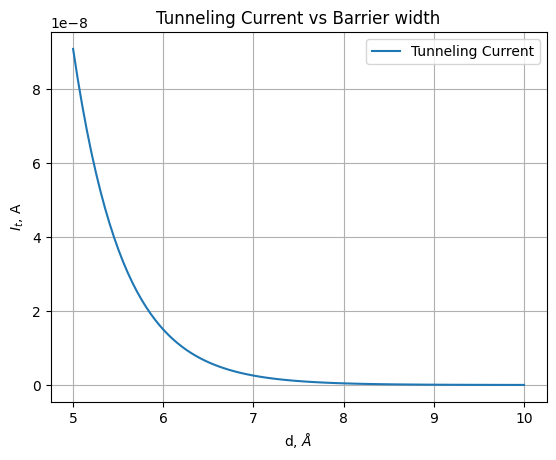

In [120]:
"""
    Dependence of the tunnel current on the barrier width.

    In this section we also calculate the value of the wave vector for studing system. This value will be used in previous blocks.
     
"""
e = 1.6e-19
beta = 1

J0 = ((e**2) * np.sqrt(2*m)) / (beta * (2*np.pi*hbar)**2) # Eq.(26)

# phi = 4.5 *e  # Work function eV
phi = (phi_s+phi_t)/2

V = 0.3 # Applied voltage in eV

k = np.sqrt(2 * m * (phi - e*V))/hbar # is the wave vector in 1/A, if V is low. 

A = (2 *beta* np.sqrt(2*m)) / hbar #Eq.(23)

# Calculate the varying tip-sample separation (distance) from the surface profile
d = np.linspace(5e-10, 10e-10, 100)

# Eq.(25)
tunneling_current = (J0 / d) * np.sqrt(phi/2)* V * np.exp( - A * d *np.sqrt(phi/2)) # redused Planck constant in 6.5821e-16 eV*s or 1.054e-34 J*s

print(f"k = {k:.4} 1/m, A={A:.4}, J0={J0:.7}")

# Plot the results
plt.plot(d*1e10, tunneling_current * S, label='Tunneling Current')
plt.xlabel('d, $\AA$')
plt.ylabel('$I_{t}$, A')
plt.title('Tunneling Current vs Barrier width')
plt.legend()
plt.grid(True)
plt.show()

The tunneling current decays exponentially with the gap distance $d$ indicating the high sensitivity of this method. For a typical value of the work function (~ 4.5 eV), the tunneling current decreases by a factor ~10 for every 0.1 nm increase in $d$. This means that over a typical atomic diameter, for example, 0.3 nm, the tunneling current changes by a factor **~1000!** 

The **sensitivity of STM** typically refers as the ability to detect small changes in tunneling current $ \Delta I$ by changing the distance $\Delta d$ between the STM tip and the sample surface.

$$ Sensitivity = \frac{\Delta I}{\Delta d}$$

In [ ]:
phi = 4.5 * e
d = 5e-10
delta_d = 3e-20

J0 = 7.87903797e+13 #value taken from previousncalculation
V = 0.3

tunneling_current = (J0 / d) * np.sqrt(phi/2)* V * np.exp( - A * d *np.sqrt(phi/2))

tunneling_current_2 = (J0 / (d+delta_d)) * np.sqrt(phi/2)* V * np.exp( - A * (d+delta_d) *np.sqrt(phi/2))


print(f'tunneling_current = {tunneling_current *S} A')
print(f'tunneling_current_2 = {tunneling_current_2*S}A') 
print(f'Sensitivity = {(tunneling_current - tunneling_current_2)*S/delta_d} A/m')

    **!?** Estimate the lateral resolution of the method, that indicates the ability of the STM to resolve fine details laterally on the surface being scanned.

tunnel curren density J = 0.3


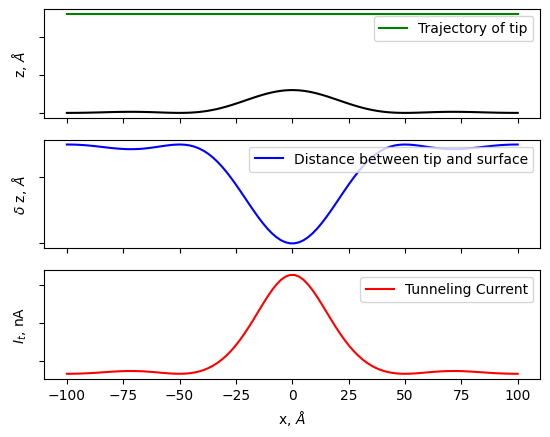

In [86]:
"""
    Using analitical solutions to find the tunnel current through a one-dimensional potential barrier :

    - dependence of the tunnel current on the distance between the tip and the surface of the sample (Fig.1c);

"""
V = 0.3 # Applied voltage in eV
beta = 1
J0 = 7.879038e+13
A = (2 * beta * np.sqrt(2 * m)) / hbar
phi = (phi_s+phi_t)/2
# Surface profile function sinc^2(x)

# Parameters for scaling and shifting
width_scaling_factor = 5e-9 # m Adjust this value to widen or narrow the peak
height_scaling_factor = 0.3e-10  # m Adjust this value to lower or raise the entire function

##############################################################################
def surface_profile(x):
    return height_scaling_factor * np.sinc(x / width_scaling_factor)**2  # Example: sine wave profile

##############################################################################

# Generate x values for the surface profile
x_values = np.linspace(-10e-9, 10e-9, 100)

profile = surface_profile(x_values)
z0 = np.max(profile) + 1e-10 # distance between the tip and sample's surface in this mode is constant = 1e-10
z = z0 - profile 


# Calculate tunneling current at each position x
tunneling_current_surface = (J0 / z) * np.sqrt(phi)* V * np.exp( - A * z *np.sqrt(phi)) 
print (f"tunnel curren density J = {V}")


# Create a figure with 3 subplots stacked vertically
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True)

# Plot: The surface's cross section and tip's thrajectory
ax0.plot(x_values/1e-10, profile/1e-10, color='black') #label='Distance between tip and surface',
ax0.plot(x_values/1e-10, z0/1e-10 * np.ones_like(x_values), label='Trajectory of tip', color='green' )  # Plotting z0(x)

ax0.set_ylabel('z, $\AA$')
ax0.set_yticklabels([])
ax0.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Plot: Distance between tip and surface
ax1.plot(x_values/1e-10, z/1e-10, label='Distance between tip and surface', color='blue') #
ax1.set_ylabel('$\delta$ z, $\AA$')
ax1.set_yticklabels([])
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Plot the results for power-law relationship on the second subplot
ax2.plot(x_values/1e-10, tunneling_current_surface *S * 1e-9, label='Tunneling Current', color='red')
ax2.set_xlabel('x, $\AA$ ')
ax2.set_yticklabels([])
ax2.set_ylabel('$I_{t}$, nA')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))

# plt.suptitle('Tunneling Current vs Tip-Sample Separation')
plt.show()

   **!?** In this exercise, you can change the surface profile by modifying the function 'surface_profile(x)'

In this section it is proposed to analyse the real STM datas: 
- InAs(111) - the material for the optoelectronic industry [\[8\]](#bibliography): definition of morphology at V = 2.4V, 300K.

The data is saved in format .gwd for working in Gwyddion [\[9\]](#bibliography). Also, this program can be installed using Python libraries "gwyfile" (in more detail [\[10\]](#bibliography)).

In [48]:
%pip install gwyfile

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


dict_keys(['54-1 Z TraceUp '])
<GwyObject "GwyDataField">('xres', 'yres', 'xreal', 'yreal', 'si_unit_xy', 'si_unit_z', 'data')
yreal=5e-08, si_unit_xy=<GwyObject "GwySIUnit">('unitstr'), si_unit_z<GwyObject "GwySIUnit">('unitstr'), data=(800, 800)


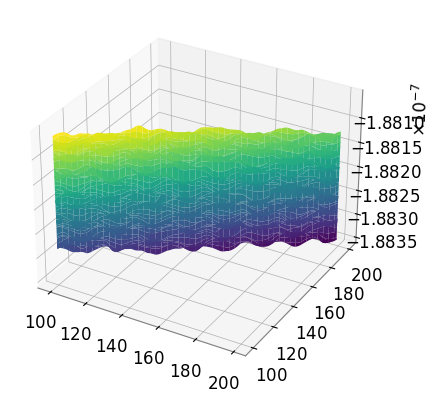

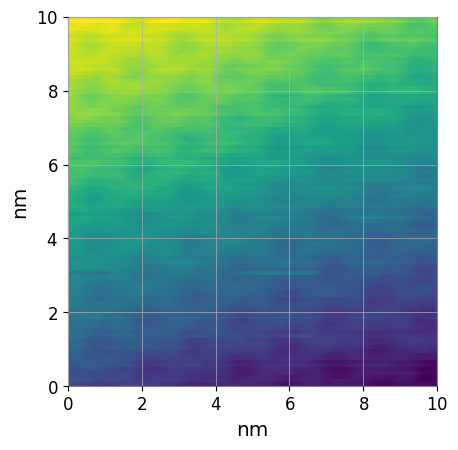

In [69]:
"""
To change the sample you need to change the link in the next line "file_path = 'the_pass_to_the_file.gwy":
        - InAs(111) - ./data_STM/InAs(111)/InAs(111).gwy


If you want to build a specified area of the surfase: ax.imshow(data[100:200, 100:200], interpolation='none', origin='upper',
                                                                extent=(0, channel.xreal, 0, channel.yreal)) 

                                                        # Adjusted extent for 10nm x 10nm area > channel.xreal=10
                                                                                                 channel.yreal=10
"""

import gwyfile
import matplotlib.pyplot as plt

file_path = './data_STM/InAs(111)/InAs(111).gwy'
obj = gwyfile.load(file_path)
channels = gwyfile.util.get_datafields(obj)

print(channels.keys()) 
key = list(channels.keys())[0]
channel = channels[key]
print(channel)

data = channel.data

print(f"yreal={channel.yreal}, si_unit_xy={channel.si_unit_xy}, si_unit_z{channel.si_unit_z}, data={data.shape}")
# Datafield objects have a `data` property to access their
# two-dimensional data as numpy arrays.

# Plot the data using matplotlib.
# 3D
fig, ax = plt.subplots(projection='3d')
ax.plot_surface(np.arange(100,200), np.linspace(100,200, 100), data[100:200, 100:200], cmap='viridis')

#2D
fig, ax = plt.subplots()
ax.imshow(data[100:200, 100:200], interpolation='none', origin='upper',
        extent=(0, 10, 0, 10))

plt.xlabel('nm')
plt.ylabel('nm')

# ax.imshow(data, interpolation='none', origin='upper',
#         extent=(0, channel.xreal, 0, channel.yreal)) # all data
# x = np.linspace(0, 5, 800)
# plt.plot(x*10, data[300,:], label='Cross Section', color='red')
plt.show()



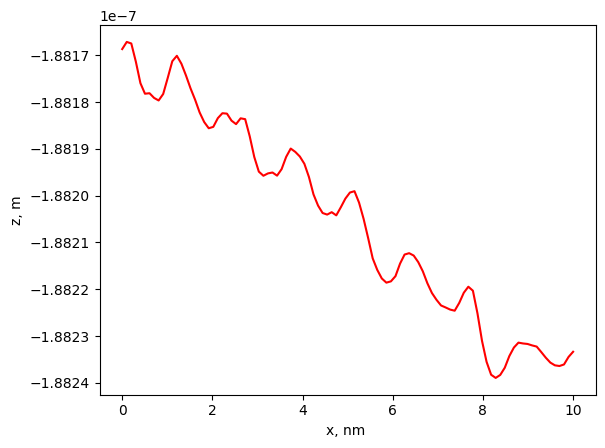

In [119]:
#for plotting a cross section

# all data
# x = np.linspace(0, 5, 800)
# plt.plot(x*10, data[300,:], label='Cross Section', color='red')

#selected region
selected_region = data[100:200, 100:200]
x = np.linspace(0, 10, selected_region.shape[1])
plt.plot(x, selected_region[50, :], label='Cross Section', color='red')

plt.xlabel('x, nm ')
plt.ylabel('z, m')

plt.show()

## 5. Conclusion

Scanning tunneling microscopy emerges as a powerful tool for nanoscale investigations, providing high resolution and precise control over surface analysis. Its capabilities hold immense potential for applications across diverse fields. With its ability to reveal atomic-scale details and manipulate individual atoms, STM continues to drive advancements in nanotechnology, materials science, surface chemistry, and beyond. As research progresses, the innovative applications of STM are expected to further expand, shaping the forefront of scientific exploration and technological innovation.

## Bibliography

[1] G. Binnig, H. Rohrer, Scanning tunneling microscopy, Physica B+C, 127, Issues 1–3, P.37-45, 1984. https://doi.org/10.1016/S0378-4363(84)80008-X.

[2] S. Lounis, Theory of Scanning Tunneling Microscopy, arXiv:1404.0961, 2014. https://doi.org/10.48550/arXiv.1404.0961.

[3] L. Bi et al, Recent progress in probing atomic and molecular quantum coherence with scanning tunneling microscopy, Progress in Surface Science 98, P.100696, 2023. https://doi.org/10.1016/j.progsurf.2022.100696.

[4] M. Ye, S. Eremeev, K. Kuroda et al, Quasiparticle interference on the surface of 3D topological insulator $\text{Bi}_{2}\text{Se}_{3}$ induced by cobalt adatom in the absence of ferromagnetic ordering,  arXiv:1112.3206, 2011. https://doi.org/10.48550/arXiv.1112.3206.

[5] https://en.wikipedia.org/wiki/WKB_approximation

[6] https://www.ntmdt-si.com/resources/spm-theory/theoretical-background-of-spm/1-scanning-tunnel-microscopy-stm

[7] John G. Simmons, Generalized Formula for the Electric Tunnel Effect between Similar Electrodes Separated by a Thin Insulating Film, J. Appl. Phys. 34, P.1793–1803, 1963. https://doi.org/10.1063/1.1702682.

[8] Alexey N. Mihalyuk, Leonid V. Bondarenko et al, Emergence of quasi-1D spin-polarized states in ultrathin Bi films on InAs(111)A for spintronics applications, Nanoscale 16, 1272, 2024. https://doi.org/10.1039/d3nr03830k.

[9] http://gwyddion.net

[10] https://pypi.org/project/gwyfile/




